# Covid-19 Data Analysis
### Completed by Michael Willis in September 2021
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

#### Read the dataset

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-20-2021.csv'
covid = pd.read_csv(url)

#### Display the top 5 rows in the data

In [4]:
covid.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-06-21 04:21:41,33.93911,67.709953,101906,4122,64401.0,30399.0,Afghanistan,253.630125,3.984443
1,NaN,NaN,NaN,Albania,2021-06-21 04:21:41,41.15330,20.168300,132490,2454,129918.0,118.0,Albania,4603.864063,1.852215
2,NaN,NaN,NaN,Algeria,2021-06-21 04:21:41,28.03390,1.659600,135821,3631,94571.0,37619.0,Algeria,309.732656,2.673372
3,NaN,NaN,NaN,Andorra,2021-06-21 04:21:41,42.50630,1.521800,13842,127,13650.0,65.0,Andorra,17914.967967,0.917497
4,NaN,NaN,NaN,Angola,2021-06-21 04:21:41,-11.20270,17.873900,37678,859,31676.0,5143.0,Angola,114.640336,2.279845


#### Show the information of the dataset

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3813 non-null   object 
 3   Country_Region       3987 non-null   object 
 4   Last_Update          3987 non-null   object 
 5   Lat                  3899 non-null   float64
 6   Long_                3899 non-null   float64
 7   Confirmed            3987 non-null   int64  
 8   Deaths               3987 non-null   int64  
 9   Recovered            710 non-null    float64
 10  Active               708 non-null    float64
 11  Combined_Key         3987 non-null   object 
 12  Incident_Rate        3899 non-null   float64
 13  Case_Fatality_Ratio  3945 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 436.2+ KB


#### Sum of missing values of features in the dataset

In [6]:
covid.isna().sum()

FIPS                    721
Admin2                  716
Province_State          174
Country_Region            0
Last_Update               0
Lat                      88
Long_                    88
Confirmed                 0
Deaths                    0
Recovered              3277
Active                 3279
Combined_Key              0
Incident_Rate            88
Case_Fatality_Ratio      42
dtype: int64

#### Confirmed cases by country

In [148]:
covid.groupby('Country_Region').agg({'Confirmed':'sum'}).reset_index()

,Country_Region,Confirmed
0,Afghanistan,101906
1,Albania,132490
2,Algeria,135821
3,Andorra,13842
4,Angola,37678
...,...,...
190,Vietnam,13258
191,West Bank and Gaza,312673
192,Yemen,6885
193,Zambia,129033


#### Deaths by country

In [15]:
covid.groupby('Country_Region').agg({'Deaths': 'sum'}).reset_index()

,Country_Region,Deaths
0,Afghanistan,4122
1,Albania,2454
2,Algeria,3631
3,Andorra,127
4,Angola,859
...,...,...
190,Vietnam,66
191,West Bank and Gaza,3551
192,Yemen,1355
193,Zambia,1644


#### Recovered cases by country

In [42]:
covid.groupby('Country_Region')['Recovered'].sum().reset_index()

,Country_Region,Recovered
0,Afghanistan,64401.0
1,Albania,129918.0
2,Algeria,94571.0
3,Andorra,13650.0
4,Angola,31676.0
...,...,...
190,Vietnam,5229.0
191,West Bank and Gaza,306240.0
192,Yemen,3953.0
193,Zambia,108960.0


#### Active cases by country

In [43]:
covid['Active'] = covid['Confirmed'] - covid['Deaths'] - covid['Recovered']
covid.groupby('Country_Region')['Active'].sum().reset_index()

,Country_Region,Active
0,Afghanistan,33383.0
1,Albania,118.0
2,Algeria,37619.0
3,Andorra,65.0
4,Angola,5143.0
...,...,...
190,Vietnam,7963.0
191,West Bank and Gaza,2882.0
192,Yemen,1577.0
193,Zambia,18429.0


#### Latest number of confirmed, deaths, recovered and active cases country-wise

In [140]:
covid['Active'] = covid['Confirmed'] - covid['Deaths'] - covid['Recovered']
covid.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

C:\Users\mikew\AppData\Local\Temp/ipykernel_17068/3800599415.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,101906,4122,64401.0,33383.0
1,Albania,132490,2454,129918.0,118.0
2,Algeria,135821,3631,94571.0,37619.0
3,Andorra,13842,127,13650.0,65.0
4,Angola,37678,859,31676.0,5143.0
...,...,...,...,...,...
190,Vietnam,13258,66,5229.0,7963.0
191,West Bank and Gaza,312673,3551,306240.0,2882.0
192,Yemen,6885,1355,3953.0,1577.0
193,Zambia,129033,1644,108960.0,18429.0


#### Countries with no recovered cases

In [149]:
#Swapped back to .agg() for practice
covid_recovered = covid.groupby('Country_Region').agg({'Recovered': 'sum'}).reset_index()
covid_recovered[covid_recovered['Recovered'].apply(lambda x: x == 0)]

,Country_Region,Recovered
16,Belgium,0.0
91,Kiribati,0.0
134,Palau,0.0
154,Serbia,0.0
167,Summer Olympics 2020,0.0
169,Sweden,0.0
181,US,0.0


#### Countries with no confirmed cases

In [150]:
covid_confirmed = covid.groupby('Country_Region').agg({'Confirmed': 'sum'}).reset_index()
covid_confirmed[covid_confirmed['Confirmed'].apply(lambda x: x == 0)]

,Country_Region,Confirmed
134,Palau,0


#### Countries with no deaths

In [151]:
covid_deaths = covid.groupby('Country_Region').agg({'Deaths': 'sum'}).reset_index()
covid_deaths[covid_deaths['Deaths'].apply(lambda x: x == 0)]

,Country_Region,Deaths
50,Dominica,0
75,Holy See,0
91,Kiribati,0
112,Marshall Islands,0
116,Micronesia,0
134,Palau,0
149,Samoa,0
160,Solomon Islands,0
167,Summer Olympics 2020,0


#### Confirmed, deaths, and recovered cases where there are no deaths

In [152]:
covid_results = covid.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
covid_no_deaths = covid_results[covid_results['Deaths'].apply(lambda x: x == 0)]
covid_no_deaths

C:\Users\mikew\AppData\Local\Temp/ipykernel_17068/3216924677.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country_Region,Confirmed,Deaths,Recovered
50,Dominica,191,0,189.0
75,Holy See,27,0,27.0
91,Kiribati,2,0,0.0
112,Marshall Islands,4,0,4.0
116,Micronesia,1,0,1.0
134,Palau,0,0,0.0
149,Samoa,3,0,3.0
160,Solomon Islands,20,0,20.0
167,Summer Olympics 2020,1,0,0.0


#### Top 10 countries with confirmed cases

In [153]:
covid.groupby('Country_Region')['Confirmed'].sum().sort_values(ascending=False).reset_index()[:10]

,Country_Region,Confirmed
0,US,33596844
1,India,29935221
2,Brazil,17927928
3,France,5819313
4,Turkey,5370299
5,Russia,5255214
6,United Kingdom,4646068
7,Argentina,4268789
8,Italy,4252976
9,Colombia,3945166


#### Top 10 countries with active cases

In [154]:
covid['Active'] = covid['Confirmed'] - covid['Deaths'] - covid['Recovered']
covid.groupby('Country_Region')['Active'].sum().sort_values(ascending=False).reset_index()[:10]

,Country_Region,Active
0,France,5306251.0
1,United Kingdom,4502218.0
2,Spain,3526414.0
3,Brazil,1680640.0
4,Netherlands,1661395.0
5,Sweden,1070062.0
6,Belgium,1054279.0
7,Serbia,708752.0
8,India,702887.0
9,Switzerland,373263.0


#### Plot of Country-wise total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [155]:
import matplotlib.pyplot as plt

In [156]:
covid_deaths = covid.groupby('Country_Region')['Deaths', 'Confirmed', 'Recovered', 'Active'].sum().reset_index()
over_50000_deaths = covid_deaths[covid_deaths['Deaths'].apply(lambda x: x > 50000)]
over_50000_deaths

C:\Users\mikew\AppData\Local\Temp/ipykernel_17068/3968487142.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country_Region,Deaths,Confirmed,Recovered,Active
6,Argentina,89043,4268789,3890213.0,289533.0
23,Brazil,501825,17927928,15745463.0,1680640.0
37,Colombia,99934,3945166,3667161.0,178071.0
62,France,110914,5819313,402148.0,5306251.0
66,Germany,90400,3730126,3604050.0,35676.0
79,India,388135,29935221,28844199.0,702887.0
80,Indonesia,54662,1989909,1792528.0,142719.0
81,Iran,82965,3095135,2748320.0,263850.0
85,Italy,127270,4252976,4037996.0,87710.0
115,Mexico,231187,2477283,1971470.0,274626.0


C:\Users\mikew\AppData\Local\Temp/ipykernel_17068/143876994.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



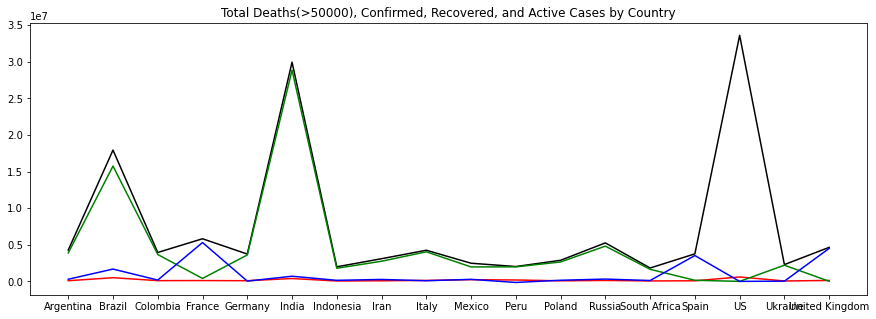

In [164]:
covid_deaths = covid.groupby('Country_Region')['Deaths', 'Confirmed', 'Recovered', 'Active'].sum().reset_index()
over_50000_deaths = covid_deaths[covid_deaths['Deaths'].apply(lambda x: x > 50000)]

plt.figure(figsize=(15, 5))
plt.plot(over_50000_deaths['Country_Region'], over_50000_deaths['Deaths'],color='red')
plt.plot(over_50000_deaths['Country_Region'], over_50000_deaths['Confirmed'],color='black')
plt.plot(over_50000_deaths['Country_Region'], over_50000_deaths['Recovered'], color='green')
plt.plot(over_50000_deaths['Country_Region'], over_50000_deaths['Active'], color='blue')

plt.title('Total Deaths(>50000), Confirmed, Recovered, and Active Cases by Country')
plt.show()


#### Plot of statewise deaths in USA

In [165]:
import plotly.express as px

In [166]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [167]:
us_data = covid_data[(covid_data['Country_Region'] == 'US')]
us_states = us_data.groupby('Province_State')['Deaths'].sum().reset_index()
us_states_deaths = us_states[us_states['Deaths'] > 0]

px.bar(data_frame=us_states_deaths, x='Province_State', y='Deaths', title='State wise deaths reported of COVID19 in the USA', text='Deaths')

#### Plot of statewise active cases in USA

In [168]:
us_data = covid_data[(covid_data['Country_Region'] == 'US')]
us_data['Active'] = us_data['Confirmed'] - us_data['Deaths'] - us_data['Recovered']
us_states = us_data.groupby('Province_State')['Active'].sum().reset_index()
us_states_active = us_states[us_states['Active'] > 0]

px.bar(data_frame=us_states_active, x='Province_State', y='Active', title='State wise active cases of COVID19 in the USA', text='Active')

C:\Users\mikew\AppData\Local\Temp/ipykernel_17068/2096959343.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Plot of statewise confirmed cases in USA

In [169]:
us_data = covid_data[(covid_data['Country_Region'] == 'US')]
us_states = us_data.groupby('Province_State')['Confirmed'].sum().reset_index()
us_states_active = us_states[us_states['Confirmed'] > 0]

px.bar(data_frame=us_states_active, x='Province_State', y='Confirmed', title='State wise confirmed cases of COVID19 in the USA', text='Confirmed')

In [170]:
us_data = covid_data[(covid_data['Country_Region'] == 'US')]
us_data['Active'] = us_data['Confirmed'] - us_data['Deaths'] - us_data['Recovered']
us_states = us_data.groupby('Province_State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
us_states_combined = pd.melt(us_states, id_vars='Province_State', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], value_name='Count', var_name='Cases')

px.bar(data_frame=us_states_combined, x='Province_State', y='Count', title='State wise confirmed, deaths, recovered, and active cases of COVID19 in the USA', text='Count', barmode='group', color='Cases')

C:\Users\mikew\AppData\Local\Temp/ipykernel_17068/2517311816.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mikew\AppData\Local\Temp/ipykernel_17068/2517311816.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### Plot of worldwide confirmed cases over time

In [171]:
import plotly.express as px
import plotly.io as pio

In [172]:
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-20-2021.csv'
covid = pd.read_csv(url)

In [173]:
covid_confirmed = covid.groupby('Last_Update')['Last_Update', 'Confirmed'].sum().reset_index()

px.line(data_frame=covid_confirmed, x='Last_Update', y='Confirmed', title='Worldwide Confirmed Novel COVID-19 Cases Over Time')

C:\Users\mikew\AppData\Local\Temp/ipykernel_17068/1799666508.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

